In [1]:
print("hello world")

hello world


In [2]:
import matplotlib.pyplot as plt

In [3]:
pip install numpy==1.23.5


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os
print("Current Dir ", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")

Current Dir  c:\Users\beher\OneDrive\Desktop\potato_disease_project


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode ="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle = True,
    interpolation ="bilinear",
)

Found 900 files belonging to 3 classes.


In [9]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode ="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle = True,
    interpolation ="bilinear",
)

Found 300 files belonging to 3 classes.


In [11]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\beher\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3973 - loss: 1.4663 - val_accuracy: 0.5067 - val_loss: 0.9918
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5918 - loss: 0.8322 - val_accuracy: 0.6900 - val_loss: 0.5794
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6540 - loss: 0.7545 - val_accuracy: 0.7667 - val_loss: 0.4547
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8047 - loss: 0.4189 - val_accuracy: 0.8833 - val_loss: 0.3199
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8920 - loss: 0.3026 - val_accuracy: 0.8767 - val_loss: 0.3433
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8598 - loss: 0.3815 - val_accuracy: 0.9267 - val_loss: 0.1845
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9445 - loss: 0.1763 - val_accuracy: 0.9267 - val_loss: 0.1763
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9197 - loss: 0.2085 - val_accuracy: 0.9167 - val_loss:

In [15]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - accuracy: 0.9529 - loss: 0.0886
Training accuracy: 0.9633333086967468


In [16]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.9232 - loss: 0.1980
Validation accuracy: 0.9300000071525574


In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history

{'accuracy': [0.47333332896232605,
  0.6677777767181396,
  0.6844444274902344,
  0.8255555629730225,
  0.8777777552604675,
  0.8888888955116272,
  0.9433333277702332,
  0.9355555772781372,
  0.9733333587646484,
  0.9722222089767456],
 'loss': [1.1460931301116943,
  0.7222417593002319,
  0.6813408732414246,
  0.3829208314418793,
  0.32000428438186646,
  0.2977508008480072,
  0.1607353240251541,
  0.18813267350196838,
  0.07647795230150223,
  0.0778319463133812],
 'val_accuracy': [0.5066666603088379,
  0.6899999976158142,
  0.7666666507720947,
  0.8833333253860474,
  0.8766666650772095,
  0.9266666769981384,
  0.9266666769981384,
  0.9166666865348816,
  0.9466666579246521,
  0.9300000071525574],
 'val_loss': [0.9917663335800171,
  0.5793535113334656,
  0.45473572611808777,
  0.3199141323566437,
  0.3433288633823395,
  0.18449057638645172,
  0.17633762955665588,
  0.18407976627349854,
  0.12466929107904434,
  0.16393540799617767]}

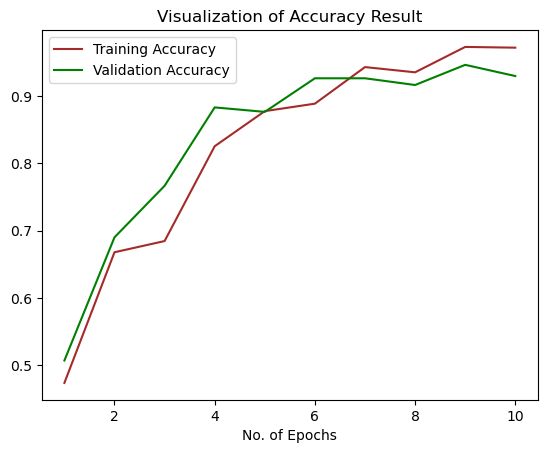

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()